<a href="https://colab.research.google.com/github/Mohan-359/Exploratory-Data-Analysis-/blob/main/module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix_Tittles**

# **Project Summary**

This is an Unsupervised Machine learning project in this project I will have to build a model that can be capable of clustering different different types of data. The dataset is about netflix shows which has 8807 rows and 16 columns like show_id which represents ID of the show, type represents type of the show, title represents show title, cast represents name of the casting stars, country represents the country of the show, date added represents the date when the show is added to netflix, release_year represents the year the show was released, rating represents the rating of the show, duration represents the length of the show, listed_in tells what type and where the show belongs from, description gives short descriptions about the show. My task is to read and understand the data after that I will have to show some meaningfull charts and explain everything about the chart then according to the visualization chart I will have to make some hypothesis assumptions about the project then testing the assumptions. Then I will handle missing and null values and outliers after completing these all task I will look for imbalanced data if there is any imbalanced data then I will have to deal with that. Then I will select some important features further I will split the data for test and training purpose.

# **GitHub Link**

https://github.com/Mohan-359

## **Problem Statement**

The Goal of this project is to analyze and visualize the Netflix Titles Dataset,which contains information about Movies and TV shows available on Netflix

# **Project Type - Data Visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/archive.zip')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


In [26]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 8807
Number of columns: 16


In [5]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
df['country']=df['country'].fillna('unknown')

In [7]:
df['director']=df['director'].fillna('unknown')

In [ ]:
df['cast']=df['cast'].fillna('unknown')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')

In [10]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

In [11]:
type_counts=df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [12]:
top_countries=df['country'].value_counts().head(10)
print(top_countries)


country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [13]:
top_genres=df['listed_in'].value_counts().head(10)
print(top_genres)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [14]:
df.to_csv('netflix_cleaned.csv', index=False)
print("✅ Cleaned data saved successfully as netflix_cleaned.csv")

✅ Cleaned data saved successfully as netflix_cleaned.csv


In [15]:
from google.colab import files
files.download ('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


**Bar Chart - Top 10 Countries**

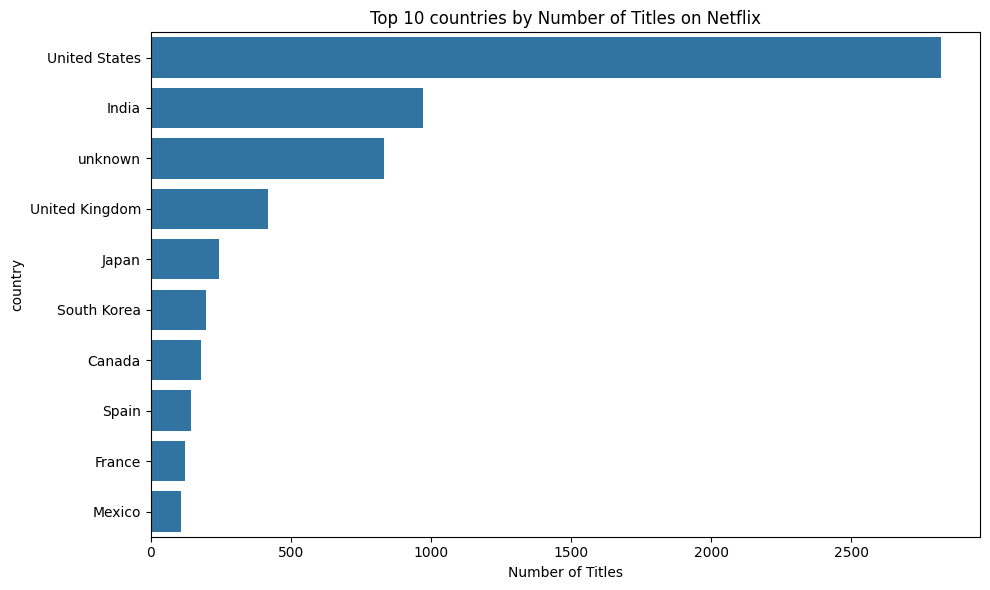

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["country"].value_counts().head(10).values,
            y=df["country"].value_counts().head(10).index)
plt.title('Top 10 countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('country')
plt.tight_layout()
plt.show()

**Line Chart Content Added by Year**

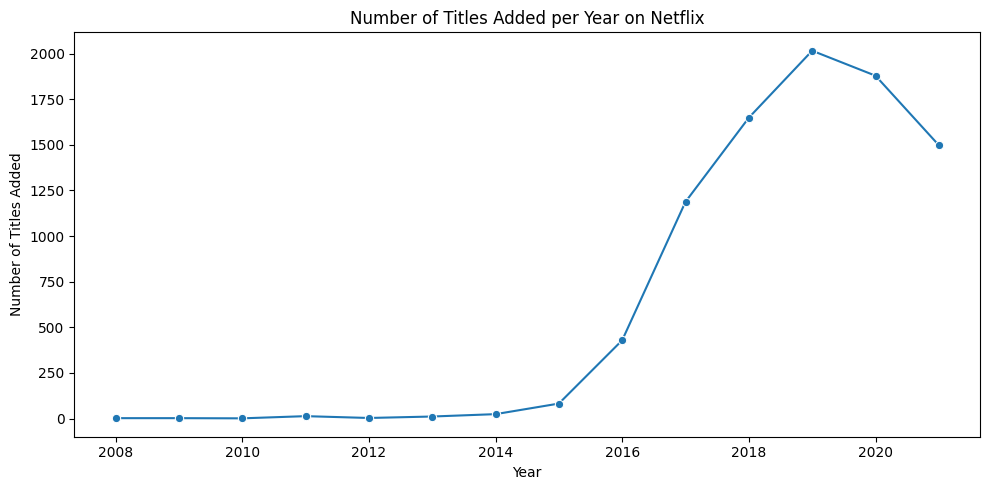

In [20]:
titles_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')
plt.title('Number of Titles Added per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()

**Pie Chart - Movies vs TV Shows**

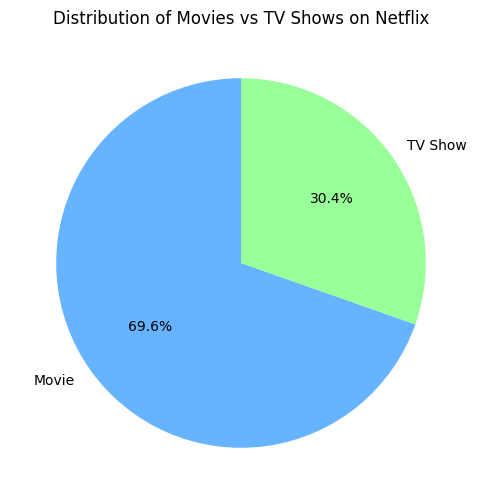

In [21]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.show()

**Histogram - Movie Duration Distribution**

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-448326919.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)


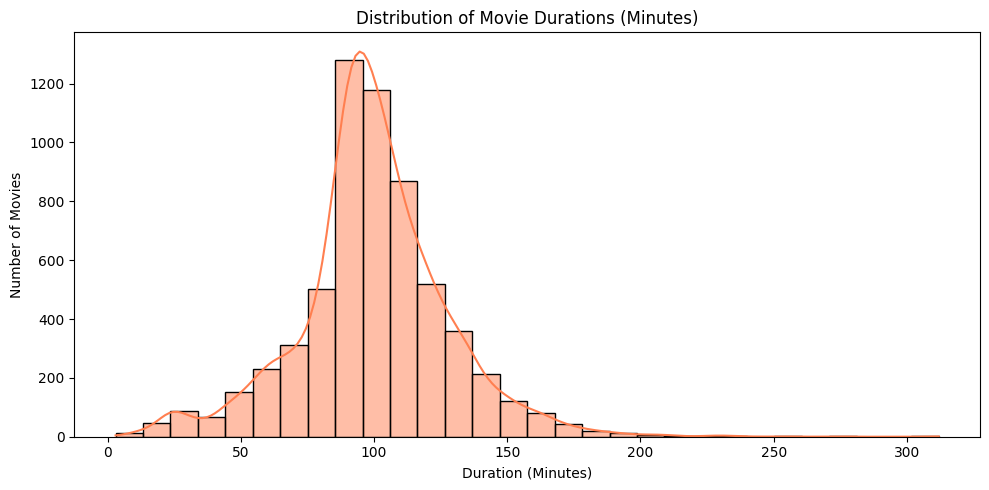

In [22]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

movies = df[df['type'] == 'Movie']
plt.figure(figsize=(10,5))
sns.histplot(movies['duration_numeric'], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**Heatmap - Correlation Matrix**

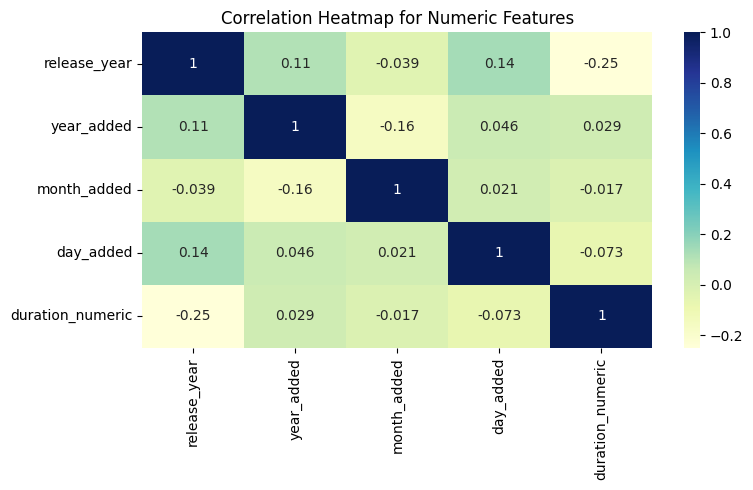

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap for Numeric Features')
plt.tight_layout()
plt.show()

# **Conclusion**

The Netflix Data Visualization Challenge demonstrates how structured data analysis and visual storytelling can reveal meaningful insights.By cleaning, exploring, and visualizing the Netflix dataset, we gain a clear view of global streaming trends, content diversity, and platform growth patterns over time.